## 1. Data wrangling

### 1a. Read the data first

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
listing_df = pd.read_csv("listings.csv")
print(listing_df.shape) #18291 rows and 74 columns. Not a very big data frame.
listing_df.head()

(18291, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210208155251,2021-02-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.92
1,20168,https://www.airbnb.com/rooms/20168,20210208155251,2021-02-11,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.54
2,25428,https://www.airbnb.com/rooms/25428,20210208155251,2021-02-10,"Lovely, spacious 1 bed apt in Center(with lift)",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20210208155251,2021-02-11,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,1.98
4,28871,https://www.airbnb.com/rooms/28871,20210208155251,2021-02-10,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.63


The data frame has 18291 rows and 74 columns. Missing values are presented in several columns.
Data types such as string, float, and object are observed in the data frame. I might also need
to handle column such as 'amenities' with list like format. But let's start with missing data first.

### 1b. Total missing data

In [ ]:
# Calculate total missing data %
missing_count = listing_df.isnull().sum()
total_cells = np.product(listing_df.shape)
total_missing = missing_count.sum()
print('Total missing data: ',round((total_missing/total_cells) * 100,2), '%')

Total missing data:  12.31 %


### 1c. Missing data by column

In [ ]:
# Calculate missing data % by column
def missing_perc(df):
    missing_df = pd.DataFrame()
    missing_df['Col Name'] = list(df.columns)
    missing_df['Missing %'] = [round(i/listing_df.shape[0] * 100,2) for i in df.isnull().sum()]
    missing_df.sort_values(by=['Missing %'], ascending=False,inplace=True)
    missing_df['Missing %'] = missing_df['Missing %'].astype('str') + '%'
    pd.set_option('display.max_rows', None)
    return missing_df
missing_perc(listing_df)

,Col Name,Missing %
28,neighbourhood_group_cleansed,100.0%
48,calendar_updated,100.0%
67,license,100.0%
34,bathrooms,100.0%
15,host_response_rate,78.48%
14,host_response_time,78.48%
16,host_acceptance_rate,57.38%
13,host_about,42.74%
6,neighborhood_overview,34.27%
26,neighbourhood,34.27%


As I can tell from the table above, there are over 30 columns not having missing data.
However, there are also over 40 columns that do have missing data, and four of them
are completed empty. They are 'neighbourhood_group_cleansed', 'calendar_updated',
'license' and 'bathrooms' and need to be dropped.

### 1d. Drop empty columns

In [ ]:
listing_df_cleaned = listing_df.drop(['neighbourhood_group_cleansed', 'calendar_updated',
                                             'license', 'bathrooms'], axis=1, inplace=False)
listing_df_cleaned.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210208155251,2021-02-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,10.0,9.0,10.0,t,1,0,1,0,1.92
1,20168,https://www.airbnb.com/rooms/20168,20210208155251,2021-02-11,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,10.0,9.0,t,2,0,2,0,2.54
2,25428,https://www.airbnb.com/rooms/25428,20210208155251,2021-02-10,"Lovely, spacious 1 bed apt in Center(with lift)",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,10.0,f,1,1,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20210208155251,2021-02-11,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,10.0,t,1,0,1,0,1.98
4,28871,https://www.airbnb.com/rooms/28871,20210208155251,2021-02-10,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,10.0,f,2,0,2,0,2.63


### 1e. Check for duplicates

In [ ]:
listing_df_cleaned[listing_df_cleaned.duplicated()==True]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


No duplicates are found!

## 2. Optimize memory usage

This data frame is not a big one so in real world it is probably not worth the effort
to optimize memory usage. In this project, it is still a good practice to convert each
column to appropriate data type.

In [ ]:
# In the data frame, we have 20 float64, 17 int64 and 33 objects
listing_df_cleaned.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18291 entries, 0 to 18290
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18291 non-null  int64  
 1   listing_url                                   18291 non-null  object 
 2   scrape_id                                     18291 non-null  int64  
 3   last_scraped                                  18291 non-null  object 
 4   name                                          18258 non-null  object 
 5   description                                   17994 non-null  object 
 6   neighborhood_overview                         12023 non-null  object 
 7   picture_url                                   18291 non-null  object 
 8   host_id                                       18291 non-null  int64  
 9   host_url                                      18291 non-null 

In [ ]:
# Define a function of memory usage for panda df
def memory_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

### 2a. Downcast the numeric types

In [ ]:
pd.reset_option('max_rows')
# Downcast int64 and float
listing_df_int = listing_df_cleaned.select_dtypes(include=['int64'])
converted_int = listing_df_int.apply(pd.to_numeric,downcast='unsigned')
listing_df_float = listing_df_cleaned.select_dtypes(include=['float'])
converted_float = listing_df_float.apply(pd.to_numeric,downcast='float')
# Save a copy of listing_df_cleaned to a new df
listing_df_optim = listing_df_cleaned.copy()
listing_df_optim[converted_int.columns] = converted_int # Write converted int to new df
listing_df_optim[converted_float.columns] = converted_float # Write converted float to new df

### 2b. Convert date columns to date type

Columns 'last_scraped', 'host_since', 'calendar_last_scraped',
'first_review', 'last_review' are stored as an object. They
need to convert to date data type.

In [ ]:
listing_df_optim['last_scraped'] = pd.to_datetime(listing_df_optim['last_scraped'],format='%Y-%m-%d')
listing_df_optim['host_since'] = pd.to_datetime(listing_df_optim['host_since'],format='%Y-%m-%d')
listing_df_optim['calendar_last_scraped'] = pd.to_datetime(listing_df_optim['calendar_last_scraped'],format='%Y-%m-%d')
listing_df_optim['first_review'] = pd.to_datetime(listing_df_optim['first_review'],format='%Y-%m-%d')
listing_df_optim['last_review'] = pd.to_datetime(listing_df_optim['last_review'],format='%Y-%m-%d')

### 2c. Convert object columns to categoricals if necessary

Some columns, such as 'host_location' can be converted to
catogoricals. In the chunk code below, I set up the ratio
of determining whether an object column should be converted
to a catogorical column to 0.1. This means after removing
duplicates, only those columns with less than 10% left will
be converted.

In [ ]:
listing_df_obj = listing_df_optim.select_dtypes(include=['object']).copy()
converted_obj = pd.DataFrame()
for col in listing_df_obj.columns:
    num_unique_values = len(listing_df_obj[col].unique())
    num_total_values = len(listing_df_obj[col])
    if num_unique_values / num_total_values < 0.1:
        converted_obj.loc[:,col] = listing_df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = listing_df_obj[col]
listing_df_optim[converted_obj.columns] = converted_obj
listing_df_optim.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18291 entries, 0 to 18290
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            18291 non-null  uint32        
 1   listing_url                                   18291 non-null  object        
 2   scrape_id                                     18291 non-null  uint64        
 3   last_scraped                                  18291 non-null  datetime64[ns]
 4   name                                          18258 non-null  object        
 5   description                                   17994 non-null  object        
 6   neighborhood_overview                         12023 non-null  object        
 7   picture_url                                   18291 non-null  object        
 8   host_id                                       18291 non-null  uint

Take a look at the info of converted data frame, I notice
some columns need to be further converted to correct data type.
For example, 'host_response_rate', 'host_acceptance_rate' and
'price' need to convert to numeric data type, whereas 'host_is_superhost',
'host_has_profile_pic', 'host_identity_verified', 'has_availability'
 and 'instant_bookable' are better to be classified as boolean.
Note 'host_verifications' and 'amenities' look like a list but they
are not. To further access the element within each cell of these two
columns, I need to convert them to appropriate data type.

### 2d. Handle mis-classified columns

In [ ]:
# Convert percentage or dollar values to appropriate numeric values
listing_df_optim['host_response_rate'] = [np.uint8(i.strip('%'))/100 if isinstance(i,str) else np.nan for i in listing_df_optim['host_response_rate']]
listing_df_optim['host_acceptance_rate'] = [np.uint8(i.strip('%'))/100 if isinstance(i,str) else np.nan for i in listing_df_optim['host_acceptance_rate']]
listing_df_optim['price'] = [np.float16(i.strip('$').replace(',', '')) if isinstance(i,str) else np.nan for i in listing_df_optim['price']]

In [ ]:
# Convert f or t to boolean values
listing_df_optim['host_is_superhost'] = [True if i == 't' else False if i == 'f' else np.nan for i in listing_df_optim['host_is_superhost']]
listing_df_optim['host_has_profile_pic'] = [True if i == 't' else False if i == 'f' else np.nan for i in listing_df_optim['host_has_profile_pic']]
listing_df_optim['host_identity_verified'] = [True if i == 't' else False if i == 'f' else np.nan for i in listing_df_optim['host_identity_verified']]
listing_df_optim['has_availability'] = [True if i == 't' else False if i == 'f' else np.nan for i in listing_df_optim['has_availability']]
listing_df_optim['instant_bookable'] = [True if i == 't' else False if i == 'f' else np.nan for i in listing_df_optim['instant_bookable']]

Things looks much better now, but 'host_verifications' and 'amenities' columns still
look bothersome.

### 2e. Convert list like columns to numeric

In [ ]:
# The literal_eval function from ast package will convert a string representation of list to list.
# After conversion, each cell is list.
import ast
import itertools as it
listing_df_optim['host_verifications'] = list(map((lambda x: ast.literal_eval(x)), listing_df_optim['host_verifications']))
listing_df_optim['amenities'] = list(map((lambda x: ast.literal_eval(x)), listing_df_optim['amenities']))

# Create a function to return top level values
# based on frequency for all the values combined.
def top_frequency_variables(top_level,df):
    # flatten list of lists to flattened list
    dup_list = list(it.chain.from_iterable(df.dropna()))
    # Sort list based on frequency
    dup_list = sorted(dup_list, key = dup_list.count,
                                reverse = True)
    # Remove duplicates and output selected level
    return list(dict.fromkeys(list(dup_list)))[0:top_level]

# This code takes 60 mins to complete so I will comment them out.
# The results of top levels are stored below.
# print(top_frequency_variables(15,listing_df_optim['amenities']))
# print(top_frequency_variables(10,listing_df_optim['host_verifications']))

top_15_amenity = ['Wifi','Heating','Essentials','Kitchen',
                  'Smoke alarm','TV','Washer','Long term stays allowed',
                  'Hangers','Dedicated workspace','Iron','Shampoo',
                  'Hair dryer','Hot water','Dishes and silverware']
top_10_verif = ['phone','email','reviews','jumio',
                'government_id','offline_government_id',
                'selfie','identity_manual','facebook','work_email']

# Create two new columns for amenities and host_verifications score.
listing_df_optim['amenities_score'] = listing_df_optim['amenities']
listing_df_optim['host_verifications_score'] = listing_df_optim['host_verifications']
# Convert amenities and host_verification columns to numeric. For a
# given row which is a list now, if all top level values are included,
# assign # of top level values to that row. For amenities, the range
# will decrease from 15 to 1. If nothing is included, assign 0. If
# row is None or empty list, assign np.nan. This will run 1 min.
for i in range(len(listing_df_optim['amenities'])):
    for j in range(len(top_15_amenity),0,-1):
        if (not listing_df_optim['amenities'][i]) | (listing_df_optim['amenities'][i] is None):
            listing_df_optim['amenities_score'][i] = np.nan
        elif set(top_15_amenity[0:j]).issubset(listing_df_optim['amenities'][i]):
            listing_df_optim['amenities_score'][i] = j
            break
        else:
            listing_df_optim['amenities_score'][i] = 0
    for k in range(len(top_10_verif),0,-1):
        if (not listing_df_optim['host_verifications'][i]) | (listing_df_optim['host_verifications'][i] is None):
            listing_df_optim['host_verifications_score'][i] = np.nan
        elif set(top_10_verif[0:k]).issubset(listing_df_optim['host_verifications'][i]):
            listing_df_optim['host_verifications_score'][i] = k
            break
        else:
            listing_df_optim['host_verifications_score'][i] = 0

# Drop amenities and host_verifications columns
listing_df_optim = listing_df_optim.drop(['amenities', 'host_verifications'], axis=1, inplace=False)

### 2f. Cluster and merge text categories in columns

Note 'host_location' and 'neighbourhood' columns manifest texts with similarity. For example,
'Amsterdam, Noord-Holland, The Netherlands', 'Amsterdam, Noord-Holland, Netherlands',
'Amsterdam, North Holland, Netherlands' and 'Amsterdam, North Holland, The Netherlands'
are the same location.
The 'host_location' column doesn't offer too much information here. The data quality is also
bad. Nonetheless, I will still cluster the texts to ensure no redundant information present.
The 'neighbourhood' column provides useful information so I will ensure the acurracy of clustering.

In [ ]:
# Replace 'Noord-' to 'North ' and 'The Netherlands' to 'Netherlands' for host_location
# column. This should cluster a lot of texts.
listing_df_optim['host_location'] = [i.replace('The Netherlands', 'Netherlands').replace('Noord-','North ') if isinstance(i,str) else np.nan for i in listing_df_optim['host_location']]
# For neighbourhood column, by googleing the municipal of Amsterdam, I classify all the
# texts to 'Amsterdam, North Holland, Netherlands' except 'Badhoevedorp, Noord-Holland, Netherlands'
# and 'Lijnden, Noord-Holland, Netherlands', as they do not belong to Amsterdam.
listing_df_optim['neighbourhood'] = [i.replace('Noord-','North ') if i in ['Badhoevedorp, Noord-Holland, Netherlands','Lijnden, Noord-Holland, Netherlands'] else 'Amsterdam, North Holland, Netherlands'
                                     if isinstance(i,str) else np.nan for i in listing_df_optim['neighbourhood']]

In [ ]:
print(memory_usage(listing_df_cleaned))
print(memory_usage(listing_df_optim))

77.09 MB
50.16 MB


By optimizing memory usage, I save 27 MB.

## 3. Imputing null values

Take a look at the data frame again. There are a lot of columns that are unnecessary for predicting price. For example, 'list_url', 'host_name', 'host_picture_url', etc. does not provide any value here. I will remove these unnecessary columns before imputing null values.

### 3a. Remove predictors

In [ ]:
# Remove unnecessary columns that are either not related to
# predicting listing price or duplicates
listing_df_optim = listing_df_optim.drop(['id', 'listing_url','scrape_id','last_scraped',
                      'name', 'description','neighborhood_overview','picture_url',
                      'host_id', 'host_url','host_name','host_about',
                      'host_thumbnail_url', 'host_picture_url','host_neighbourhood',
                       'host_listings_count','minimum_minimum_nights',
                       'maximum_minimum_nights','minimum_maximum_nights',
                       'maximum_maximum_nights','minimum_nights_avg_ntm',
                       'maximum_nights_avg_ntm','calculated_host_listings_count',
                       'calculated_host_listings_count_entire_homes',
                       'calculated_host_listings_count_private_rooms',
                       'calculated_host_listings_count_shared_rooms',
                       'calendar_last_scraped','host_location'],
                      axis=1, inplace=False)
listing_df_optim.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,amenities_score,host_verifications_score
0,2008-09-24,NaN,NaN,1.00,True,1.0,True,True,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,10.0,10.0,10.0,10.0,9.0,10.0,True,1.92,3,8
1,2009-12-02,NaN,NaN,1.00,False,2.0,True,True,"Amsterdam, North Holland, Netherlands",Centrum-Oost,...,10.0,10.0,10.0,10.0,10.0,9.0,True,2.54,3,8
2,2009-11-20,NaN,NaN,0.00,True,2.0,True,False,NaN,Centrum-West,...,10.0,10.0,10.0,10.0,10.0,10.0,False,0.13,15,3
3,2010-03-23,within an hour,1.0,1.00,True,1.0,True,True,"Amsterdam, North Holland, Netherlands",Centrum-West,...,10.0,10.0,10.0,10.0,10.0,10.0,True,1.98,3,6
4,2010-05-13,within an hour,1.0,0.87,True,2.0,True,True,"Amsterdam, North Holland, Netherlands",Centrum-Oost,...,10.0,10.0,10.0,10.0,10.0,10.0,False,2.63,3,6


### 3b. Remove outliers

<AxesSubplot:xlabel='price'>

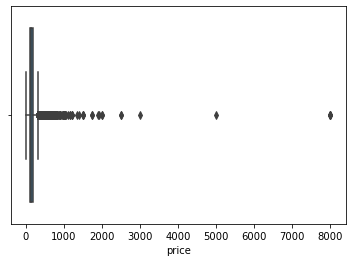

In [ ]:
# Take a look at the boxplot of response price.
# There are a few outliers around 0 and above 2000.
import seaborn as sns
sns.boxplot(x='price', data=listing_df_optim)

In [ ]:
# Remove outliers for continuous variables by quantile
listing_df_final = pd.DataFrame()
listing_df_final = listing_df_optim[
                 (listing_df_optim['price'] >= listing_df_optim['price'].quantile(0.001)) &
                 (listing_df_optim['price'] <= listing_df_optim['price'].quantile(0.999)) &
                 (listing_df_optim['host_total_listings_count'] < listing_df_optim['host_total_listings_count'].quantile(0.999)) &
                 (listing_df_optim['accommodates'] < listing_df_optim['accommodates'].quantile(0.999)) &
                 (listing_df_optim['bedrooms'] < listing_df_optim['bedrooms'].quantile(0.999)) &
                 (listing_df_optim['beds'] < listing_df_optim['beds'].quantile(0.999)) &
                 (listing_df_optim['number_of_reviews'] < listing_df_optim['number_of_reviews'].quantile(0.999)) &
                 (listing_df_optim['reviews_per_month'] < listing_df_optim['reviews_per_month'].quantile(0.999))]
# This is a crucial step. Without resetting index, listing_df_final
# will still be a subset of listing_df_optim and several functions
# excecute below will produce wrong data as index would be messed
# up.
listing_df_final = listing_df_final.reset_index(drop=True)
# Remaining data after filtering
print('Remaining data: ',round((listing_df_final.shape[0] / listing_df_optim.shape[0])*100,2), '%')

Remaining data:  81.08 %


### 3c. Data transformation

Text(0.5, 0, 'Square Root Units')

<Figure size 720x540 with 0 Axes>

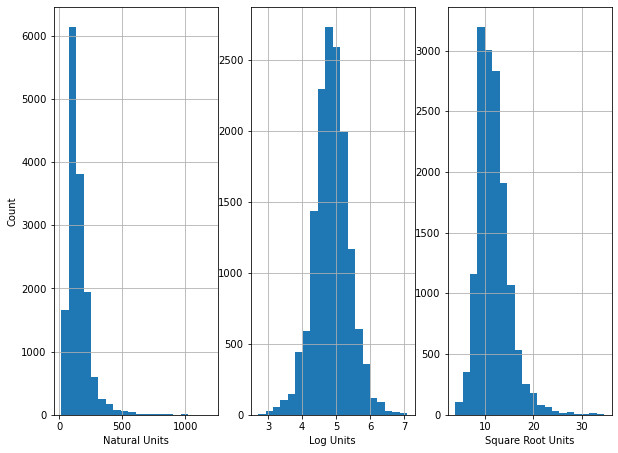

In [ ]:
# The nature distribution of price is strongly skewed,
# manifesting log distribution. Transform it to log
# and square root. The log transform shows gaussian
# distribution so I will use log transform for the response.
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(listing_df_final['price'].values, bins=20)
ax1.set_xlabel('Natural Units')
ax1.set_ylabel('Count')
ax2.hist(np.log(listing_df_final['price'].values), bins=20)
ax2.set_xlabel('Log Units')
ax3.hist(np.sqrt(listing_df_final['price'].values), bins=20)
ax3.set_xlabel('Square Root Units')
# listing_df_final['log_price'] = np.log(listing_df_optim['price'])

In [ ]:
# Add a new column log_price as new response
listing_df_final['log_price'] = np.log(listing_df_final['price'])
# Drop price column
listing_df_final = listing_df_final.drop(['price'],
                      axis=1, inplace=False)

### 3d. Dependency evaluation

In [ ]:
# Create a function to evaluate the dependency/relationship between
# two variables. If response is a numeric/date variable, use linear
# regression to predict. If reponse is a boolean/categorical variable,
# use Logistic regression to predict. The assumption is that one
# variable is sufficient enough to predict another.
import datetime as dt
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
def response_feature_score(feature,response):
  # the index of all not null values for two variables
  not_null_index = listing_df_final[pd.notnull(listing_df_final[response]) &
                                      pd.notnull(listing_df_final[feature])].index.values
  if isinstance(listing_df_final[[feature]].dropna().values[0][0],(str,bool,np.bool_)):
        # X is categorical
        X = pd.get_dummies(listing_df_final[[feature]].loc[not_null_index,feature].astype('category').to_frame())
       #X = listing_df_final[[feature]].loc[not_null_indices,feature].astype('category').cat.codes.to_frame()
  elif isinstance(listing_df_final[[feature]].dropna().values[0][0],np.datetime64):
        # Convert X to numeric value if it's date format
        X = listing_df_final[[feature]].loc[not_null_index,feature].squeeze().map(dt.datetime.toordinal).to_frame()
  else:
        # X is numeric
        X = listing_df_final[[feature]].loc[not_null_index,feature].to_frame()
  # Standardize X
  std_sc = StandardScaler().fit(X)
  X = std_sc.transform(X)
  if isinstance(listing_df_final[[response]].dropna().values[0][0],(str,bool,np.bool_)):
        # y is categorical
        y = listing_df_final[[response]].loc[not_null_index,response].astype('category')
        #clf = LogisticRegressionCV(cv=5, random_state=1, max_iter=500).fit(X, y.values.ravel())
        y = y.values.ravel()
        # use logistic regression if y is categorical
        clf = LogisticRegression(random_state=1, max_iter=2000).fit(X,
              y)
  elif isinstance(listing_df_final[[response]].dropna().values[0][0],np.datetime64):
        # Convert y to numeric value if it's date format
        y = listing_df_final[[response]].loc[not_null_index,response].squeeze().map(dt.datetime.toordinal).to_frame()
        # use linear regression if y is numeric
        clf = LinearRegression().fit(X, y)
  else:
        # y is numeric
        y = listing_df_final[[response]].loc[not_null_index,response].to_frame()
        # use linear regression if y is numeric
        clf = LinearRegression().fit(X, y)
  return clf.score(X, y)

In [ ]:
# null variables are those columns with at least one null value in the data frame
null_variables = list(pd.Series([i if listing_df_final[i].isnull().sum() != 0 else np.nan for i in listing_df_final.columns]).dropna())
# empty dict to score the best predictor for a given null variable
Best_pair = {}
# empty dict to score the highest score for all null variables
Best_score = []
# Loop through null variables and find the predictor that results in the highest
# R2 score. Store the results as a dictionary. This will take a while.
for i in null_variables:
    # empty dict to score R2 score for a given null variable
    R2_score_dict = {}
    for j in listing_df_final.columns.drop(i):
        R2_score_dict[j] = response_feature_score(j,i)
    # key value to score the best predictor
    max_score_key = max(R2_score_dict, key=R2_score_dict.get)
    # append to best pair dict
    Best_pair[i] = max_score_key
    Best_score.append(R2_score_dict[max_score_key])
    print("The max R2 score for " + str(i) + " with " + str(max_score_key) + " predictor is " + str(R2_score_dict[max_score_key]))

The max R2 score for host_response_time with host_response_rate predictor is 0.5701610253039764
The max R2 score for host_response_rate with host_response_time predictor is 0.8211112338823463
The max R2 score for host_acceptance_rate with host_response_time predictor is 0.15367892152510743
The max R2 score for neighbourhood with host_since predictor is 0.9996063379588623
The max R2 score for bathrooms_text with property_type predictor is 0.645579011263236
The max R2 score for review_scores_rating with review_scores_accuracy predictor is 0.5042698672849433
The max R2 score for review_scores_accuracy with review_scores_rating predictor is 0.5042698189716802
The max R2 score for review_scores_cleanliness with review_scores_rating predictor is 0.47289620225300844
The max R2 score for review_scores_checkin with review_scores_communication predictor is 0.41589826724245893
The max R2 score for review_scores_communication with review_scores_checkin predictor is 0.4158981837189679
The max R2 sc

Now we know the best predictor for all null variable, it is the time to impute null values.

### 3e. Imputing null with KNN method

In [ ]:
from sklearn.impute import KNNImputer
# Since KNNImputer only works with numeric variable, I need to
# convert categorical null variables to numeric.
def cat_map_num(cat_df):
    # catnum_pair is the mapping of categorical to numeric
    catnum_pair = {}
    # numcat_pair is the mapping of numeric to categorical to
    # revert back once the inputing is done
    global numcat_pair
    numcat_pair = {}
    unique_key = cat_df[pd.notnull(cat_df)].unique()
    for i, j in zip(unique_key, range(len(unique_key))):
        catnum_pair[i] = j
        numcat_pair[j] = i
    # Numeric feature of categorical variable
    listing_df_final[cat_df.name + 'map'] = cat_df.map(catnum_pair)

# Initialize KNN list, which is a list where each element is a
# dictionary. Each dictionary store the response_feature_score
# of all null variables for a given n_neighbors varing from 1
# to 15.
KNN_list = []
# df_temp is a garbable collection df to store the not null
# numeric variables for KNN imputing.
df_temp = pd.DataFrame()
df_temp = listing_df_final[['host_total_listings_count','latitude','longitude','accommodates',
                           'bedrooms','beds','minimum_nights','maximum_nights','availability_30',
                            'availability_60','availability_90','availability_365','number_of_reviews',
                            'number_of_reviews_ltm','number_of_reviews_l30d','reviews_per_month']]
df_temp['host_since_num'] = listing_df_final['host_since'].squeeze().map(dt.datetime.toordinal).to_frame()
df_temp['first_review_num'] = listing_df_final['first_review'].squeeze().map(dt.datetime.toordinal).to_frame()
df_temp['last_review_num'] = listing_df_final['last_review'].squeeze().map(dt.datetime.toordinal).to_frame()
#Looping through n_neighbors from 1 to 15 to imputing null values
#with KNN method. This will take 5 mins to finish.
for i in range(1,16):
    KNN_list.append({})
    for j in null_variables:
        if j in ['host_response_time','neighbourhood','bathrooms_text']:
            #Convert categorical to numeric, and create a seperate column
            #for it.
            cat_map_num(listing_df_final[j])
            #Imputing null values
            imputed_features = KNNImputer(n_neighbors=i).fit_transform(pd.concat([df_temp, listing_df_final[f'{j}map']], axis=1).values)
            #Map inputed null numeric values to categorical, and create a
            #seperate column. Use round function to interger to ensure
            #numeric value can be mapped back.
            listing_df_final[f'{j}_KNNimputed'] = round(pd.Series(imputed_features[:, -1]), 0).map(numcat_pair)
        else:
            #Imputing null values
            imputed_features = KNNImputer(n_neighbors=i).fit_transform(pd.concat([df_temp, listing_df_final[j]], axis=1).values)
            #Create a new column with imputed data
            listing_df_final[f'{j}_KNNimputed'] = pd.Series(imputed_features[:,-1])
    # Store response_feature_score to KNN list
    KNN_list[i-1]['host_response_time_KNNimputed neighbors ' + str(i)] = response_feature_score('host_response_rate_KNNimputed','host_response_time_KNNimputed')
    KNN_list[i-1]['host_response_rate_KNNimputed neighbors ' + str(i)] = response_feature_score('host_response_time_KNNimputed','host_response_rate_KNNimputed')
    KNN_list[i-1]['host_acceptance_rate_KNNimputed neighbors ' + str(i)] = response_feature_score('host_response_time_KNNimputed','host_acceptance_rate_KNNimputed')
    KNN_list[i-1]['neighbourhood_KNNimputed neighbors ' + str(i)] = response_feature_score('host_since','neighbourhood_KNNimputed')
    KNN_list[i-1]['bathrooms_text_KNNimputed neighbors ' + str(i)] = response_feature_score('property_type','bathrooms_text_KNNimputed')
    KNN_list[i-1]['review_scores_rating_KNNimputed neighbors ' + str(i)] = response_feature_score('review_scores_accuracy_KNNimputed','review_scores_rating_KNNimputed')
    KNN_list[i-1]['review_scores_accuracy_KNNimputed neighbors ' + str(i)] = response_feature_score('review_scores_rating_KNNimputed','review_scores_accuracy_KNNimputed')
    KNN_list[i-1]['review_scores_cleanliness_KNNimputed neighbors ' + str(i)] = response_feature_score('review_scores_rating_KNNimputed','review_scores_cleanliness_KNNimputed')
    KNN_list[i-1]['review_scores_checkin_KNNimputed neighbors ' + str(i)] = response_feature_score('review_scores_communication_KNNimputed','review_scores_checkin_KNNimputed')
    KNN_list[i-1]['review_scores_communication_KNNimputed neighbors ' + str(i)] = response_feature_score('review_scores_checkin_KNNimputed','review_scores_communication_KNNimputed')
    KNN_list[i-1]['review_scores_location_KNNimputed neighbors ' + str(i)] = response_feature_score('review_scores_value_KNNimputed','review_scores_location_KNNimputed')
    KNN_list[i-1]['review_scores_value_KNNimputed neighbors ' + str(i)] = response_feature_score('review_scores_rating_KNNimputed','review_scores_value_KNNimputed')
    KNN_list[i-1]['amenities_score_KNNimputed neighbors ' + str(i)] = response_feature_score('property_type','amenities_score_KNNimputed')
    KNN_list[i-1]['host_verifications_score_KNNimputed neighbors ' + str(i)] = response_feature_score('host_identity_verified','host_verifications_score_KNNimputed')

The max average score of all missing variables is 0.4495847820523265 from neighbor 1


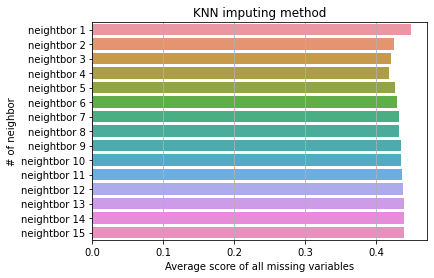

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=[np.mean(list(KNN_list[i].values())) for i in range(len(KNN_list))], y=[f'neightbor {i+1}' for i in range(len(KNN_list))])
# Add labels to your graph
plt.xlabel('Average score of all missing variables')
plt.ylabel('# of neighbor')
plt.title("KNN imputing method");
print(f'The max average score of all missing variables is {np.max([np.mean(list(KNN_list[i].values())) for i in range(len(KNN_list))])} from neighbor 1')

### 3f. Imputing null with linear/logistic prediction

In [ ]:
# Initialize LL dict to store the pair of null response and
# response_feature_score.
LL_dict = {}

# Remove KNNimputed and map columns
main_variables = listing_df_final.columns[list(map(lambda x : 'KNNimputed' not in x, listing_df_final.columns))]
main_variables = main_variables[:len(main_variables)-3]
listing_df_LL = listing_df_final[main_variables]

#Looping through all null variables and use linear
#to predict the missing values if response is
#numeric variable. Use logistic model ro predict
#if response is categorical. Return LL_dict at
#the end.
for response in null_variables:
    # empty dict to score R2 score for a given null variable
    R2_score_dict = {}
    for i in listing_df_LL.columns.drop(response):
        R2_score_dict[i] = response_feature_score(i, response)
    # feature list to store the features for a given null variable,
    # ranking from highest to lowest based on R2 score
    feature_list = sorted(R2_score_dict.items(), key=lambda item: item[1], reverse=True)
    # this for loop is a compromised version of find best pair of
    # reponse and feature. To use linear or logistic model to predict
    # missing values, the feature is better to not have any null values.
    # Therefore, I start from the highest score and step down unless
    # a feature with no null values found.
    for j in feature_list:
        if listing_df_LL[j[0]].notnull().sum() == listing_df_LL.shape[0]:
            feature = j[0]
            break
        else:
            pass
    not_null_index = listing_df_LL[pd.notnull(listing_df_LL[response]) &
                                      pd.notnull(listing_df_LL[feature])].index.values
    y_null_index = listing_df_LL[pd.isnull(listing_df_LL[response])].index.values
    if isinstance(listing_df_LL[[feature]].dropna().values[0][0], (str, bool, np.bool_)):
        # X is categorical
        X_train = listing_df_LL[[feature]].loc[not_null_index, feature].astype('category').cat.codes.to_frame()
        X_test = listing_df_LL[[feature]].loc[y_null_index, feature].astype('category').cat.codes.to_frame()
    elif isinstance(listing_df_final[[feature]].dropna().values[0][0], np.datetime64):
        # Convert X to numeric value if it's date format
        X_train = listing_df_LL[[feature]].loc[not_null_index, feature].squeeze().map(
            dt.datetime.toordinal).to_frame()
        X_test = listing_df_LL[[feature]].loc[y_null_index, feature].squeeze().map(dt.datetime.toordinal).to_frame()
    else:
        # X is numeric
        X_train = listing_df_LL[[feature]].loc[not_null_index, feature].to_frame()
        X_test = listing_df_LL[[feature]].loc[y_null_index, feature].to_frame()
    # Standardize X
    std_sc = StandardScaler().fit(X_train)
    X_train = std_sc.transform(X_train)
    std_sc1 = StandardScaler().fit(X_test)
    X_test = std_sc1.transform(X_test)
    if isinstance(listing_df_LL[[response]].dropna().values[0][0], (str, bool, np.bool_)):
        # y is categorical
        y_train = listing_df_LL[[response]].loc[not_null_index, response].astype('category')
        y_test = listing_df_LL[[response]].loc[y_null_index, response].astype('category')
        # clf = LogisticRegressionCV(cv=5, random_state=1, max_iter=500).fit(X, y.values.ravel())
        y_train = y_train.values.ravel()
        # use logistic regression if y is categorical
        clf = LogisticRegression(random_state=1, max_iter=2000).fit(X_train,
                                                                    y_train)
    elif isinstance(listing_df_LL[[response]].dropna().values[0][0], np.datetime64):
        # Convert y to numeric value if it's date format
        y_train = listing_df_LL[[response]].loc[not_null_index, response].squeeze().map(
            dt.datetime.toordinal).to_frame()
        y_test = listing_df_LL[[response]].loc[y_null_index, response].squeeze().map(
            dt.datetime.toordinal).to_frame()
        # use linear regression if y is numeric
        clf = LinearRegression().fit(X_train, y_train)
    else:
        # y is numeric
        y_train = listing_df_LL[[response]].loc[not_null_index, response].to_frame()
        y_test = listing_df_LL[[response]].loc[y_null_index, response].to_frame()
        # use linear regression if y is numeric
        clf = LinearRegression().fit(X_train, y_train)
    #Score the response_feature_score to LL_dict
    LL_dict[response] = response_feature_score(feature, response)

In [ ]:
print(f'The max R2 score of all missing variables on average is {np.mean(Best_score)} with the best pair')
print(f'The max R2 score of all missing variables on average is {np.max([np.mean(list(KNN_list[i].values())) for i in range(len(KNN_list))])} with KNN method')
print(f'The max R2 score of all missing variables on average is {np.mean(list(LL_dict.values()))} with Linear/Logostic prediction method')

The max R2 score of all missing variables on average is 0.4548464810646903 with the best pair
The max R2 score of all missing variables on average is 0.4495847820523265 with KNN method
The max R2 score of all missing variables on average is 0.1999564710490682 with Linear/Logostic prediction method


The best pair score is produced under the condition that each response is paired with
the best feature so it's not surprised that the max R2 score is the highest. The KNN
method performs pretty well, slightly lower than the best pair score but it is acceptable.
The Linear/Logostic prediction method is the worst one, as I compromise the feature which
might not be the best one to predict. An example of this compromised model is host_response_time
as response and host_response_rate as feature. If they both are subsetted with null values,
the row indices are identical and there is no way to further predict under such circumstance. Therefore,
I choose KNN method with n_neighbors equals to 1 to fit the missing values.

### 3g. Fit missing values with KNN method

In [ ]:
for i in null_variables:
        if i in ['host_response_time','neighbourhood','bathrooms_text']:
            # Convert categorical to numeric, and create a seperate column
            # for it.
            cat_map_num(listing_df_final[i])
            # Imputing null values
            imputed_features = KNNImputer(n_neighbors=1).fit_transform(pd.concat([df_temp, listing_df_final[f'{i}map']], axis=1).values)
            # Map inputed null numeric values to categorical, and create a
            # seperate column. Use round function to interger to ensure
            # numeric value can be mapped back.
            listing_df_final[i] = round(pd.Series(imputed_features[:, -1]), 0).map(numcat_pair)
        else:
            # Imputing null values
            imputed_features = KNNImputer(n_neighbors=1).fit_transform(pd.concat([df_temp, listing_df_final[i]], axis=1).values)
            # Create a new column with imputed data
            listing_df_final[i] = pd.Series(imputed_features[:,-1])

listing_df_final = listing_df_final.drop(listing_df_final.columns[list(map(lambda x : 'KNNimputed' in x, listing_df_final.columns))],
                      axis=1, inplace=False)
listing_df_final = listing_df_final.drop(listing_df_final.columns[list(map(lambda x : 'map' in x, listing_df_final.columns))],
                      axis=1, inplace=False)
# Print missing percentage table again
missing_perc(listing_df_final)

,Col Name,Missing %
0,host_since,0.0%
31,review_scores_accuracy,0.0%
23,availability_90,0.0%
24,availability_365,0.0%
25,number_of_reviews,0.0%
26,number_of_reviews_ltm,0.0%
27,number_of_reviews_l30d,0.0%
28,first_review,0.0%
29,last_review,0.0%
30,review_scores_rating,0.0%


No missing values now!

## 4. Predict listing price

### 4a. Fit full model with ols

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
pd.reset_option('max_rows')

# Create a standardized df to fit full model
cat_bol_tar_variables = ['host_is_superhost','host_has_profile_pic','host_identity_verified','host_response_time',
                                  'neighbourhood','bathrooms_text','neighbourhood_cleansed','property_type','room_type',
                                  'has_availability','instant_bookable','log_price']
listing_df_std = listing_df_final.drop(cat_bol_tar_variables, axis=1, inplace=False)
listing_df_std = listing_df_std.reset_index(drop=True)

# Convert datetime to numeric variables
listing_df_std.loc[:,'host_since'] = listing_df_std[['host_since']].squeeze().map(dt.datetime.toordinal).to_frame()
listing_df_std.loc[:,'first_review'] = listing_df_std[['first_review']].squeeze().map(dt.datetime.toordinal).to_frame()
listing_df_std.loc[:,'last_review'] = listing_df_std[['last_review']].squeeze().map(dt.datetime.toordinal).to_frame()

# Standardlize all numeric variables
std_sc = StandardScaler().fit(listing_df_std)
num_col = listing_df_std.columns
listing_df_std = std_sc.transform(listing_df_std)
listing_df_std = pd.concat([pd.DataFrame(listing_df_std, columns = num_col),listing_df_final[cat_bol_tar_variables]], axis=1)

# Convert the rest boolean like variables to boolean
listing_df_std.loc[:,'host_is_superhost'] = listing_df_std['host_is_superhost'].astype('bool')
listing_df_std.loc[:,'host_has_profile_pic'] = listing_df_std['host_has_profile_pic'].astype('bool')
listing_df_std.loc[:,'host_identity_verified'] = listing_df_std['host_identity_verified'].astype('bool')
listing_df_std.loc[:,'host_is_superhost'] = listing_df_std['host_is_superhost'].astype('bool')

# Convert the rest object to catagorical variables
listing_df_std.loc[:,'host_response_time'] = listing_df_std['host_response_time'].astype('category')
listing_df_std.loc[:,'neighbourhood'] = listing_df_std['neighbourhood'].astype('category')
listing_df_std.loc[:,'bathrooms_text'] = listing_df_std['bathrooms_text'].astype('category')

# Run ols against all variables to get a sense of what the model looks like
mod1 = smf.ols(formula='log_price ~ ' + '+'.join(listing_df_std.columns.drop('log_price')), data=listing_df_std)
res1 = mod1.fit()
print (res1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     125.5
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:33:36   Log-Likelihood:                -5618.3
No. Observations:               14831   AIC:                         1.152e+04
Df Residuals:                   14689   BIC:                         1.260e+04
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

From OLS summary above, R square is 0.55 which is not bad. There seems to be
a multicollinearity problems which I will address later.

In [ ]:
# Convert ols summary to pd data frame
res1_df = pd.read_html(res1.summary().tables[1].as_html(),header=0,index_col=0)[0]
pd.set_option('display.max_rows', None)
# Initial screening method for variables is t test.
# I will keep the variabled where their p value is less than 5%,
# which means null hypothesis is rejected and the intercept of
# that variable is not likely to be zero.
res1_df[res1_df['P>|t|'] < 0.05]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.979700e+00,2.470000e-01,16.119,0.000,3.496000e+00,4.464000e+00
host_is_superhost[T.True],4.130000e-02,1.000000e-02,4.252,0.000,2.200000e-02,6.000000e-02
host_response_time[T.within an hour],-5.920000e-02,2.500000e-02,-2.407,0.016,-1.070000e-01,-1.100000e-02
bathrooms_text[T.0 shared baths],3.196000e-01,1.590000e-01,2.007,0.045,8.000000e-03,6.320000e-01
bathrooms_text[T.1 bath],5.020000e-01,7.800000e-02,6.429,0.000,3.490000e-01,6.550000e-01
bathrooms_text[T.1 private bath],5.852000e-01,7.900000e-02,7.407,0.000,4.300000e-01,7.400000e-01
bathrooms_text[T.1 shared bath],4.145000e-01,7.900000e-02,5.237,0.000,2.590000e-01,5.700000e-01
bathrooms_text[T.1.5 baths],5.298000e-01,7.800000e-02,6.770,0.000,3.760000e-01,6.830000e-01
bathrooms_text[T.1.5 shared baths],4.139000e-01,8.000000e-02,5.151,0.000,2.560000e-01,5.710000e-01
bathrooms_text[T.2 baths],6.207000e-01,7.900000e-02,7.810,0.000,4.650000e-01,7.760000e-01


I will keep most of these variables, except 'property_type' and 'host_response_time'
because only a few categorical variables are included for these two.

### 4b. Remove unnecessary predictors

In [ ]:
pd.reset_option('max_rows')
# keep variables with p value less than 0.05
useful_variables = ['host_is_superhost','neighbourhood_cleansed','bathrooms_text','host_response_rate',
                    'host_acceptance_rate', 'host_total_listings_count', 'longitude','accommodates',
                    'bedrooms', 'availability_90', 'availability_365','number_of_reviews_ltm',
                    'number_of_reviews_l30d', 'first_review','last_review', 'review_scores_rating',
                    'review_scores_cleanliness','review_scores_location', 'review_scores_value',
                    'reviews_per_month','amenities_score','log_price']

# Run ols against selected variables with p value less than 0.05
mod2 = smf.ols(formula='log_price ~ ' + '+'.join(listing_df_std[useful_variables].columns.drop('log_price')), data=listing_df_std[useful_variables])
res2 = mod2.fit()
print (res2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     255.1
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:33:36   Log-Likelihood:                -6206.4
No. Observations:               14831   AIC:                         1.253e+04
Df Residuals:                   14770   BIC:                         1.300e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

From the new OLS summary above, R square is 0.51 which is again not bad considering removing
a lot of variables. The multicollinearity problems disappear after removing some variables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a function to calculate VIF for each column in a data frame
def calc_VIF(df):
    # Calculating VIF for df
    VIF = pd.DataFrame()
    VIF['feature'] = df.columns
    std_sc = StandardScaler().fit(df)
    VIF_values = std_sc.transform(df)
#     VIF['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    VIF['VIF'] = [variance_inflation_factor(VIF_values, i) for i in range(df.shape[1])]
    VIF.sort_values(by=['VIF'], ascending=False,inplace=True)
    return VIF

# Data frame for VIF calculation as all the categorical/boolean variables
# need to be converted to numeric to calculate
VIF_df = pd.concat([listing_df_std[useful_variables].drop(['log_price','neighbourhood_cleansed','bathrooms_text',
                               'host_is_superhost'], axis=1, inplace=False), listing_df_std[useful_variables]['neighbourhood_cleansed'].cat.codes.to_frame(name='neighbourhood_cleansed'),
          listing_df_std[useful_variables]['host_is_superhost'].astype('category').cat.codes.to_frame(name='host_is_superhost'),listing_df_std[useful_variables]['bathrooms_text'].cat.codes.to_frame(name='bathrooms_text')], axis=1)

calc_VIF(VIF_df)

,feature,VIF
7,availability_365,3.300250
6,availability_90,3.267953
16,reviews_per_month,2.862444
8,number_of_reviews_ltm,2.694885
12,review_scores_rating,2.674888
5,bedrooms,2.417661
4,accommodates,2.257831
15,review_scores_value,2.025346
13,review_scores_cleanliness,1.993016
11,last_review,1.650264


Variance_inflation_factor is a parameter to detect multicollinearity problems. The variance_inflation_factor is equal to 1/(1-R^2). The higher the
R^2, the higher the VIF, which means multicollinearity exists on the variable. The lowest value of VIF is 1, which implies no multicollinearity.
A common threshold of red flag is VIF > 5. The table above looks good, but does that mean all predictors are free from multicollinearity?

<AxesSubplot:>

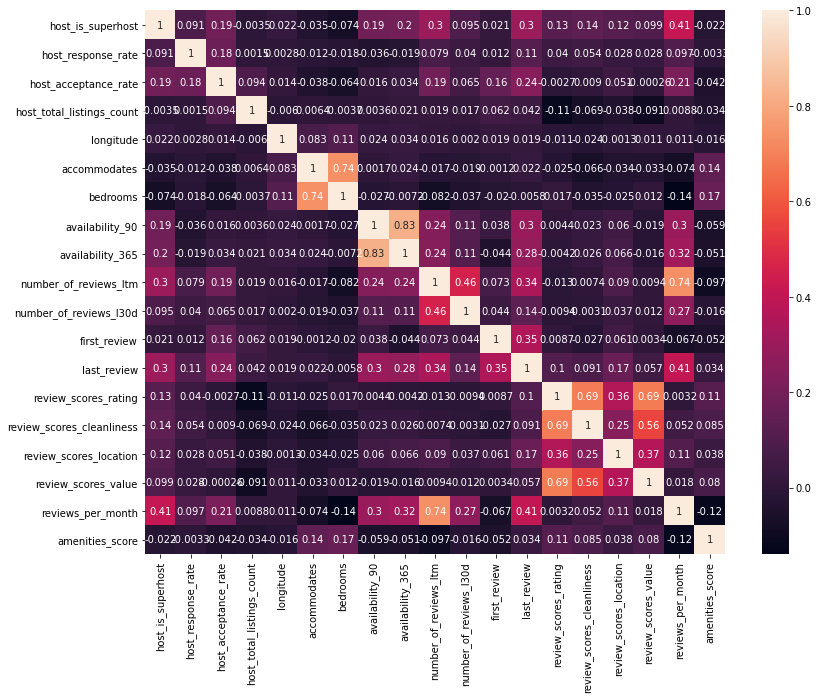

In [ ]:
# Plot correlation matrix between all features
plt.gcf().set_size_inches(13, 10)
corr_matrix = listing_df_std[useful_variables].drop(['log_price'], axis=1, inplace=False).corr()
sns.heatmap(corr_matrix, annot = True)

Most of variables are not so correlated. But some pairs manifests high correlations, such as
'bedrooms' and 'accommodates', 'availability_90' and 'availability_365', 'review_scores_rating'
and 'review_scores_value', etc,.

In [ ]:
# Set up a threshold for suspected high corr variables 0.7.
# The below pairs need attention.
suspected_pair1 = ['accommodates','bedrooms']
suspected_pair2 = ['availability_90','availability_365']
suspected_pair3 = ['number_of_reviews_ltm','reviews_per_month']
# For the pair, if the correlation of one variable against the rest
# variables is higher, remove that variable.
print(np.mean(corr_matrix[suspected_pair1]))
print(np.mean(corr_matrix[suspected_pair2]))
print(np.mean(corr_matrix[suspected_pair3]))

accommodates    0.087868
bedrooms        0.079681
dtype: float64
availability_90     0.157587
availability_365    0.159831
dtype: float64
number_of_reviews_ltm    0.189874
reviews_per_month        0.186989
dtype: float64


Remove variables 'accommodates', 'availability_365' and 'number_of_reviews_ltm'.

In [ ]:
# Remove variables 'accommodates', 'availability_365' and 'number_of_reviews_ltm' per multicollinearity
useful_variables = ['host_is_superhost','neighbourhood_cleansed','bathrooms_text','host_response_rate',
                    'host_acceptance_rate', 'host_total_listings_count', 'longitude', 'bedrooms',
                    'availability_90', 'number_of_reviews_l30d', 'first_review','last_review',
                    'review_scores_rating', 'review_scores_cleanliness','review_scores_location',
                    'review_scores_value', 'reviews_per_month','amenities_score','log_price']


# Run ols against selected variables with p value less than 0.05
mod3 = smf.ols(formula='log_price ~ ' + '+'.join(listing_df_std[useful_variables].columns.drop('log_price')), data=listing_df_std[useful_variables])
res3 = mod3.fit()
print (res3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     221.6
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:33:40   Log-Likelihood:                -6898.6
No. Observations:               14831   AIC:                         1.391e+04
Df Residuals:                   14773   BIC:                         1.435e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Filter out variables with p value greater than 0.05
res3_df = pd.read_html(res3.summary().tables[1].as_html(),header=0,index_col=0)[0]
res3_df[res3_df['P>|t|'] >= 0.05]

,coef,std err,t,P>|t|,[0.025,0.975]
neighbourhood_cleansed[T.Bijlmer-Oost],-0.045800,0.063,-0.732,0.464,-0.168,0.077
neighbourhood_cleansed[T.Geuzenveld - Slotermeer],0.093200,0.071,1.319,0.187,-0.045,0.232
neighbourhood_cleansed[T.IJburg - Zeeburgereiland],0.060800,0.052,1.173,0.241,-0.041,0.162
neighbourhood_cleansed[T.Noord-Oost],0.002000,0.052,0.039,0.969,-0.100,0.105
neighbourhood_cleansed[T.Noord-West],-0.009700,0.053,-0.183,0.854,-0.114,0.094
neighbourhood_cleansed[T.Osdorp],0.097600,0.080,1.220,0.223,-0.059,0.254
bathrooms_text[T.0 shared baths],0.170000,0.167,1.018,0.308,-0.157,0.497
bathrooms_text[T.3.5 shared baths],0.277400,0.160,1.734,0.083,-0.036,0.591
host_response_rate,0.000017,0.003,0.005,0.996,-0.006,0.006
host_acceptance_rate,0.005500,0.003,1.611,0.107,-0.001,0.012


In addition to 'host_response_rate', 'host_acceptance_rate', 'first_review', I decide to
also remove 'neighbourhood_cleansed' and 'bathrooms_text', although some sub categorical
variables for the latter two are significant.

In [ ]:
# Remove variables 'host_response_rate', 'host_acceptance_rate', 'first_review'
# 'neighbourhood_cleansed' and 'bathrooms_text'
useful_variables = ['host_is_superhost','host_total_listings_count', 'longitude', 'bedrooms',
                     'availability_90', 'number_of_reviews_l30d','last_review', 'review_scores_rating',
                     'review_scores_cleanliness','review_scores_location', 'review_scores_value',
                     'reviews_per_month','amenities_score','log_price']

mod4 = smf.ols(formula='log_price ~ ' + '+'.join(listing_df_std[useful_variables].columns.drop('log_price')), data=listing_df_std[useful_variables])
res4 = mod4.fit()
print (res4.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     555.8
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:33:40   Log-Likelihood:                -8534.4
No. Observations:               14831   AIC:                         1.710e+04
Df Residuals:                   14817   BIC:                         1.720e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

R squared drops significantly to 0.33. This may indicate that the linear regression with OLS
method may not be a suitable model to predict listing price.

### 4c. Diagnostics and fit tests

In [ ]:
# Apply some transformation on predictors to boost R square
mod5 = smf.ols(formula='''log_price ~ host_total_listings_count +
               np.square(longitude) + bedrooms + np.square(availability_90) + number_of_reviews_l30d +
               last_review + review_scores_rating + review_scores_cleanliness +
               review_scores_location + np.square(review_scores_value) +
               reviews_per_month + amenities_score''', data=listing_df_std[useful_variables])
res5 = mod5.fit()
print (res5.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     665.6
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:33:40   Log-Likelihood:                -8282.9
No. Observations:               14831   AIC:                         1.659e+04
Df Residuals:                   14818   BIC:                         1.669e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

So this is my final model, which means the listing price is heavily depending on the review
in terms of quality, time and number, amenities, listing count, longitude, bedrooms and availability.
Note longitude is kind of similar to neighborhood and you can think it as a different format of location.
This model overall makes some sense, although some metrics in the last table need further attention.

The p value of t test for all variables including intercept is less than 0.05,
which indicates all coefficients are siginificant and not equal to zero. The
Prob (F-statistic) also validates this.

Omnibus/Prob(Omnibus) is a test of the skewness and kurtosis of the residual.
If Prob(Omnibus) is 1, it means the residuals are normally distributed. In this
model, it's 0 which means the distribution of the residuals is not gaussion at
all. This violates the assumption of OLS that residuals are normally distributed.

Skew and Kurtosis looks good and fall into normal range.

Durbin-Watson tests for homoscedasticity of the residuals and the ideal range is
between 1 and 2. In this test it's 1.93 implying homoscedasticity still persists.

Jarque-Bera is is line with Omnibus so Prob(JB) is 0.

Condition Number is a test of multicollinearity and a good sign of not multicollinearity
is the number lower than 30. In this test the value is around 8 so no multicollinearity.

In [ ]:
# Convert the final model to a different format for predicting price
# The OLS regression results are exactly the same from above.
from patsy import dmatrices
y, X = dmatrices('''log_price ~ host_total_listings_count +
               np.square(longitude) + bedrooms + np.square(availability_90) + number_of_reviews_l30d +
               last_review + review_scores_rating + review_scores_cleanliness +
               review_scores_location + np.square(review_scores_value) +
               reviews_per_month + amenities_score''', data=listing_df_std[useful_variables], return_type='dataframe')
X = sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
# Predicted listing price
# Note I apply np.exp to transform it to the original scale.
y_pred = np.exp(res.predict(X))
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     665.6
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:33:40   Log-Likelihood:                -8282.9
No. Observations:               14831   AIC:                         1.659e+04
Df Residuals:                   14818   BIC:                         1.669e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Text(0, 0.5, 'Residuals')

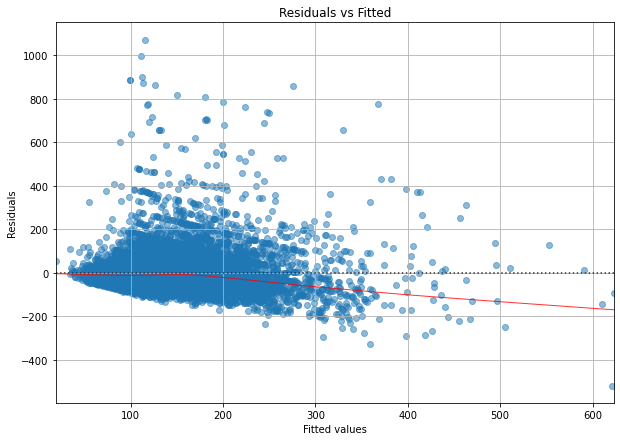

In [ ]:
# Plot the relationship between between fitted values and residuals
plt.rc('figure', figsize=(10, 7))
# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, np.exp(y)], axis=1)
# model values
model_fitted_y = np.exp(res.fittedvalues)
# model residuals
model_residuals = np.exp(y.values[0]) - model_fitted_y
# normalized residuals
model_norm_residuals = res.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = res.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = res.get_influence().cooks_distance[0]
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

The residual plot has a linear pattern, which again violates the assumption of OLS.

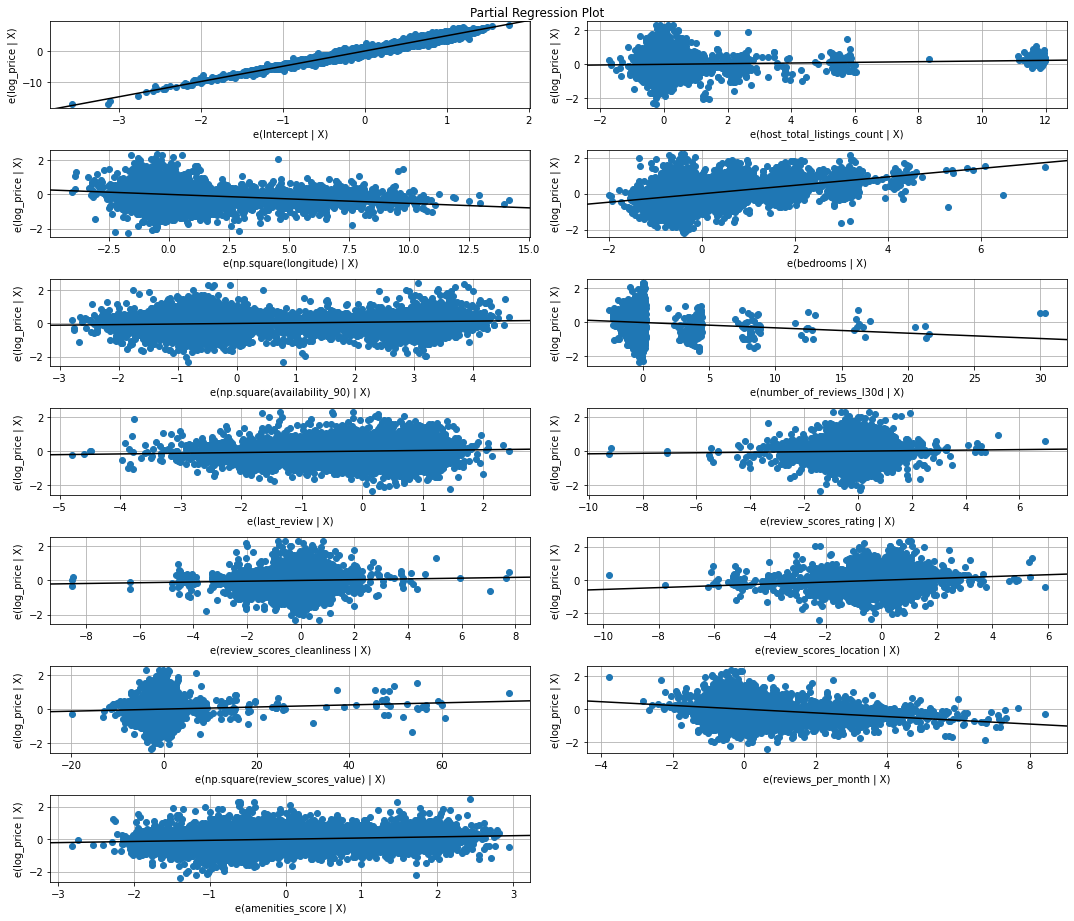

In [ ]:
# Plot the relationship between predicted y and each variable,
# holding other variables constant
plt.rc('figure', figsize=(15, 13))
fig = sm.graphics.plot_partregress_grid(res)
fig.tight_layout(pad=1.0)

I do see some variables are linear correlated with predicted listing price, such as
amenities_score and longitude. Other variables are either categoricals so that the
plot is seperated into small groups, or clustered around a certain range. These
variables are probably the root cause of residual not normally distributed and low
R squared.

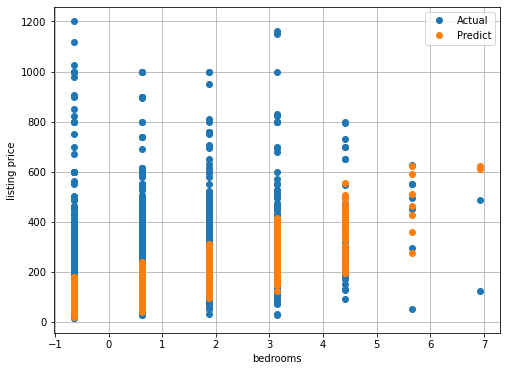

In [ ]:
# Plot the relationship between bedrooms and listing price
plt.rc('figure', figsize=(8, 6))
fig, ax = plt.subplots()
ax.plot(X[['bedrooms']], np.exp(y), 'o', label="Actual")
ax.plot(X[['bedrooms']], np.exp(res.predict(X)),  'o', label="Predict")
plt.xlabel('bedrooms')
plt.ylabel('listing price')
ax.legend(loc="best")

As expected, the model does not fit well between bedrooms and listing price, especially
in the low range.

Overall, the linear regression with OLS method does not fit well to predict the listing price. The R squared,
poor residual distribution justify this. The main reason
is because the response is a continuous variable, whereas most of features are either categorical or discrete
numeric. This adds difficulties to predict the listing price with linear regression as the relationship
is barely linear between response and feature even after transformation. A more advanced model that can better
handle such relationship should be adopted.

## 5. Summary

In this project, I start with data wrangling and optimizing memory usage. For this purpose, I remove empty columns, convert and reclassify data type, convert special data such as amenities and host_verifications_score to discrete score, and merge text categories columns. 27MB is saved in memory by these efforts.
The next step is to impute null values. To do that, I first remove some unnecessary variables and outliers, and transform listing price. Then I design a function to evaluate the dependency between two variables. The higher the score, the better the predicting power. I apply both KNN and linear/logistic reression to predict null values and use the dependency function to gause which one fits better. The KNN method has an average score of 0.45, which is slightly lower than the baseline of 0.455 as expected, but much higher than the linear/logistic regression method of 0.2. The KNN method is adopted to impute all the null values.
Finally, I use OLS regression to predict listing price. Starting with standardizing all numeric variables, I fit the full model
with OLS. I remove p value of t test greater than 0.05 and refit. Then I iterate such process until no multicollinearity presents and all the variables are significant. I apply transformation to several variables to booth R squared. The final model has R squared of 0.35 but manifests issues such as poor residual distribution and bad linear relationship between several predictors and listing price. The model does not fit well because the response is a continuous variable, whereas most of features are either categorical or discrete numeric. A more advanced model that can better handle such relationship should be adopted.

In [ ]:
print('The shape of original dataset is ' + str(listing_df.shape))

The shape of original dataset is (18291, 74)


In [ ]:
print('The shape of final dataset for OLS regression is ' + str(listing_df_std[useful_variables].shape))

The shape of final dataset for OLS regression is (14831, 14)
